In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data_stunting_1.csv')
#data = data.drop(columns=["Jumlah Murid TK"])
data = data.drop(columns=["Balita Overweight"])
#data = data.drop(columns=["Keluhan Kesehatan"])
data

,Provinsi,Persentase Keluarga Terkena Khasus Stunting,Keluhan Kesehatan,Balita Stunting,Balita Wasting,Balita Underweight,Indeks Khusus Penanganan Stunting,Jumlah Murid TK
0,Aceh,62.20,68.78,33.2,10.7,23.8,61.95,95644
1,Sumatera Utara,62.31,71.70,25.8,7.9,16.5,58.56,108145
2,Sumatera Barat,67.55,55.09,23.3,7.4,18.1,63.97,81172
3,Riau,62.57,80.27,22.3,9.2,19.3,60.04,80164
4,Jambi,60.23,74.06,22.4,9.1,16.7,61.03,47324
...,...,...,...,...,...,...,...,...
29,Sulawesi Barat,71.30,72.98,33.8,7.1,23.1,66.03,23063
30,Maluku,67.83,68.40,28.7,12.0,26.4,50.91,20652
31,Maluku Utara,65.86,66.58,27.5,10.6,22.4,53.42,20207
32,Papua Barat,73.79,64.05,26.2,10.8,19.9,56.45,11223


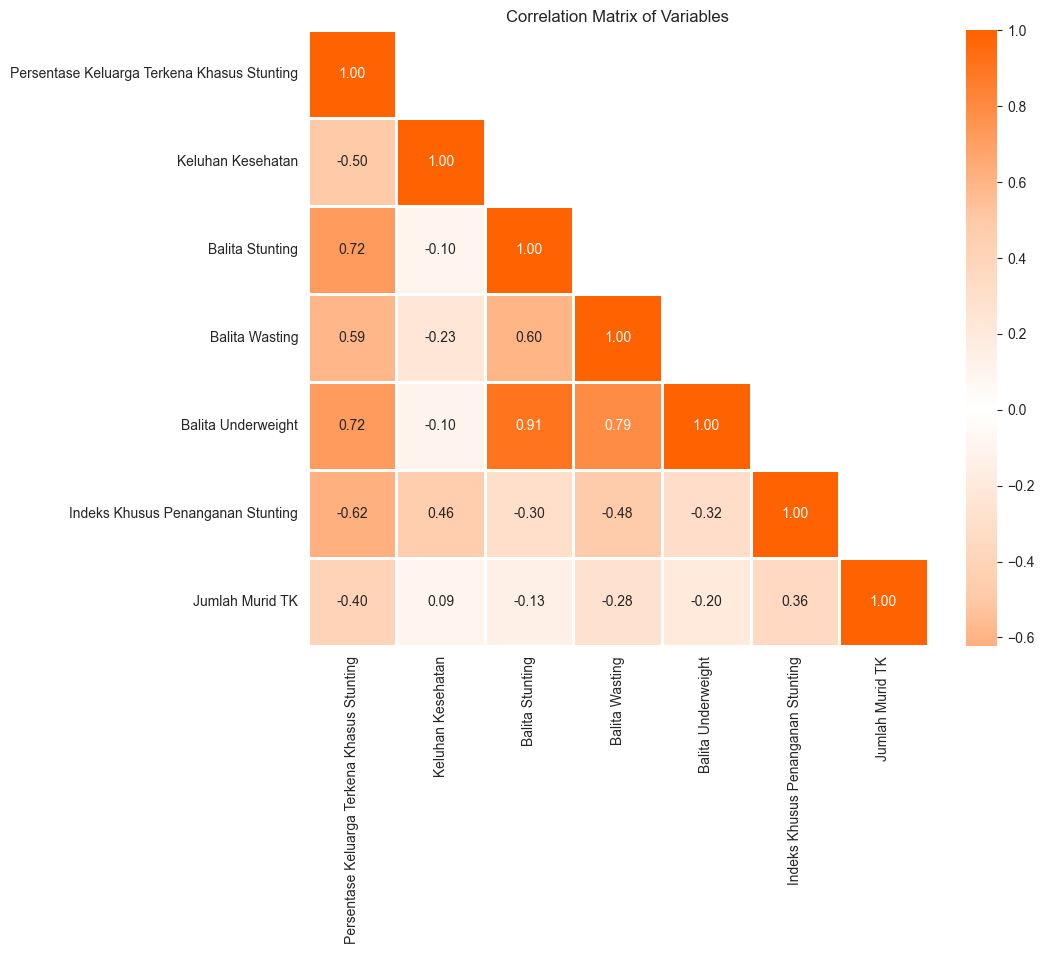

In [2]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Drop kolom 'Provinsi' pada variabel data
data = data.drop(columns=["Provinsi"])

sns.set_style('whitegrid')

colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
correlation_matrix = data.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask, k=1)] = True
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Visualisasikan korelasi matriks menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix of Variables')
plt.show()

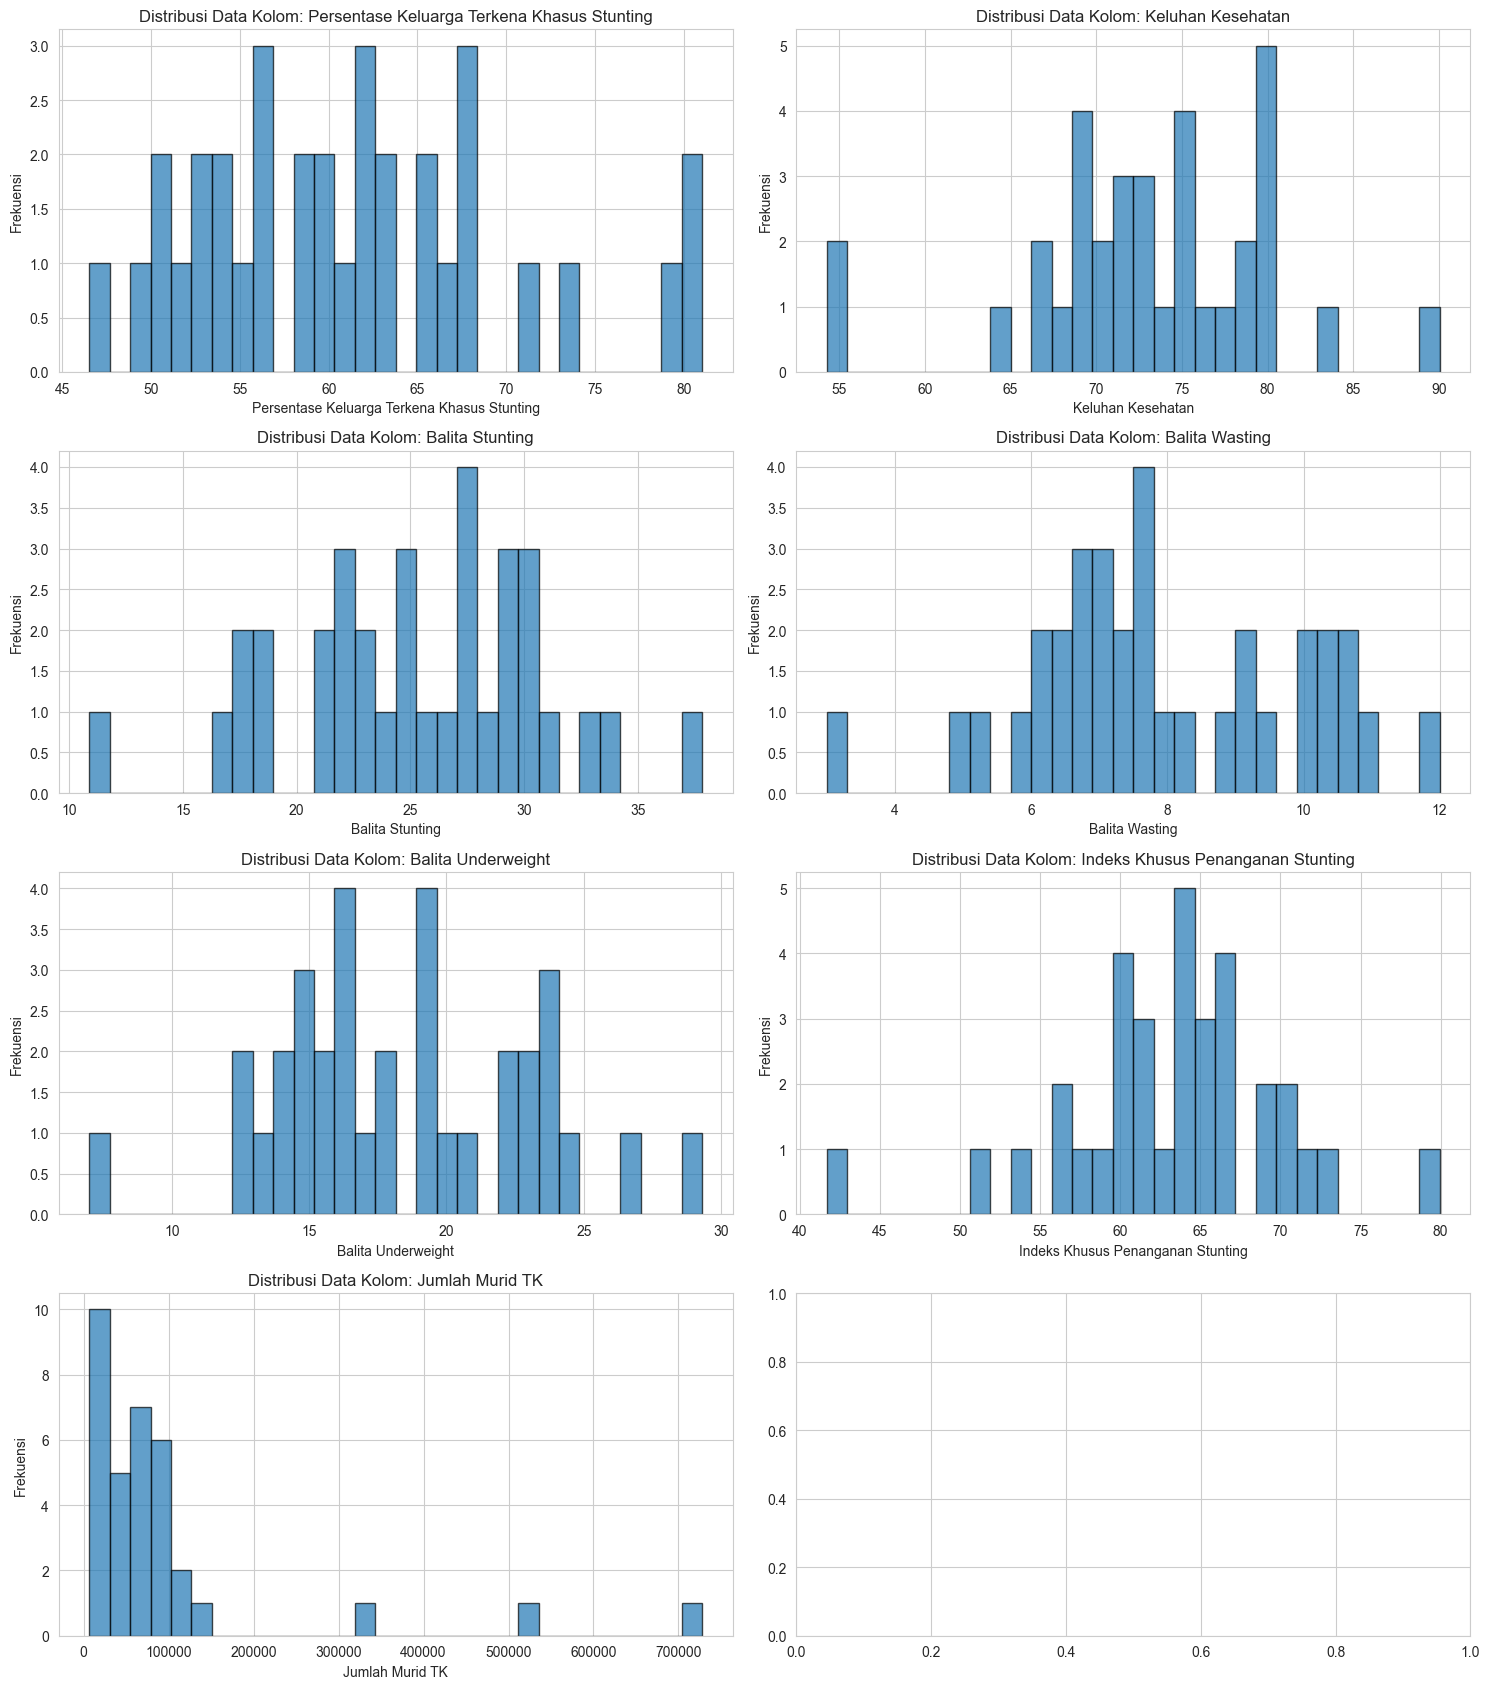

In [3]:
# Buat histogram untuk distribusi data setiap kolom
num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns//2 + num_columns%2, ncols=2, figsize=(15, 5*num_columns//2))

for i, column in enumerate(data.columns):
    ax = axes[i//2, i%2]
    ax.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribusi Data Kolom: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frekuensi')
    ax.grid(True)

plt.tight_layout()
plt.show()

c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Optimal number of clusters: 2


c:\Users\M S I\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


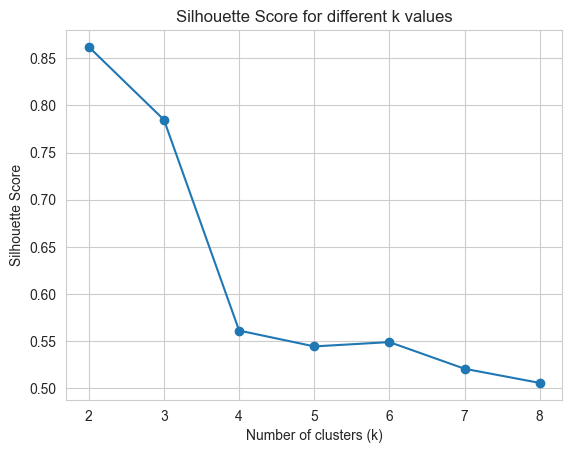

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Rentang nilai k yang akan dicoba
k_values = range(2, 9)
silhouette_scores = []

# Menghitung Silhouette Score untuk setiap nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menentukan nilai k yang optimal
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Melakukan fit model KMeans dengan nilai k yang optimal
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_kmeans.fit(data)
optimal_cluster_labels = optimal_kmeans.predict(data)

# Plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for different k values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [5]:
data

,Persentase Keluarga Terkena Khasus Stunting,Keluhan Kesehatan,Balita Stunting,Balita Wasting,Balita Underweight,Indeks Khusus Penanganan Stunting,Jumlah Murid TK
0,62.20,68.78,33.2,10.7,23.8,61.95,95644
1,62.31,71.70,25.8,7.9,16.5,58.56,108145
2,67.55,55.09,23.3,7.4,18.1,63.97,81172
3,62.57,80.27,22.3,9.2,19.3,60.04,80164
4,60.23,74.06,22.4,9.1,16.7,61.03,47324
...,...,...,...,...,...,...,...
29,71.30,72.98,33.8,7.1,23.1,66.03,23063
30,67.83,68.40,28.7,12.0,26.4,50.91,20652
31,65.86,66.58,27.5,10.6,22.4,53.42,20207
32,73.79,64.05,26.2,10.8,19.9,56.45,11223


In [6]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(data)
minmax = pd.DataFrame(minmax, columns =['Persentase Keluarga Terkena Khasus Stunting', 'Keluhan Kesehatan', 'Balita Stunting','Balita Wasting', 'Balita Underweight', 'Indeks Khusus Penanganan Stunting','Jumlah Murid TK'])

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(data)
standard = pd.DataFrame(standard, columns =['Persentase Keluarga Terkena Khasus Stunting', 'Keluhan Kesehatan', 'Balita Stunting','Balita Wasting', 'Balita Underweight','Indeks Khusus Penanganan Stunting','Jumlah Murid TK'])

scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(data)
robust = pd.DataFrame(robust, columns =['Persentase Keluarga Terkena Khasus Stunting', 'Keluhan Kesehatan', 'Balita Stunting','Balita Wasting', 'Balita Underweight','Indeks Khusus Penanganan Stunting','Jumlah Murid TK'])

In [7]:
minmax

,Persentase Keluarga Terkena Khasus Stunting,Keluhan Kesehatan,Balita Stunting,Balita Wasting,Balita Underweight,Indeks Khusus Penanganan Stunting,Jumlah Murid TK
0,0.454519,0.405368,0.828996,0.855556,0.753363,0.529550,0.123262
1,0.457706,0.487000,0.553903,0.544444,0.426009,0.440900,0.140603
2,0.609502,0.022645,0.460967,0.488889,0.497758,0.582374,0.103187
3,0.465238,0.726587,0.423792,0.688889,0.551570,0.479603,0.101789
4,0.397451,0.552977,0.427509,0.677778,0.434978,0.505492,0.056234
...,...,...,...,...,...,...,...
29,0.718134,0.522784,0.851301,0.455556,0.721973,0.636245,0.022580
30,0.617613,0.394744,0.661710,1.000000,0.869955,0.240847,0.019236
31,0.560545,0.343864,0.617100,0.844444,0.690583,0.306485,0.018619
32,0.790267,0.273134,0.568773,0.866667,0.578475,0.385722,0.006156


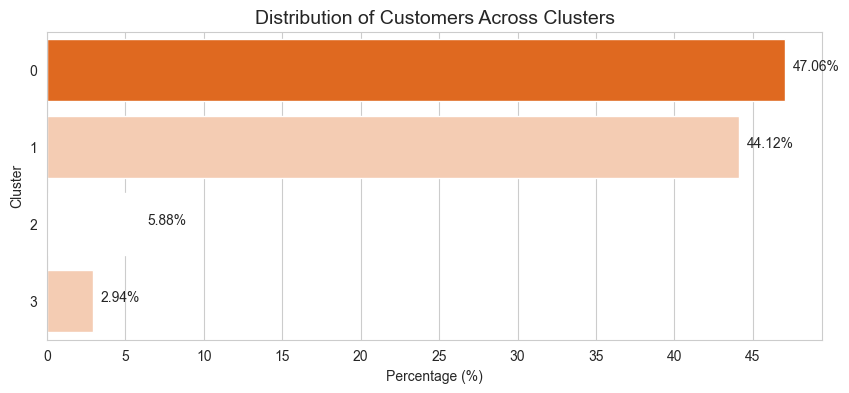

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |         34         |
|    Silhouette Score     | 0.5546104589377431 |
| Calinski Harabasz Score | 226.19073782678723 |
|  Davies Bouldin Score   | 0.4152218356737702 |
+-------------------------+--------------------+


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
import numpy as np

# Apply KMeans clustering using the optimal k (now 4)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])
data['cluster'] = new_labels

####################################################################################################

# Calculate the percentage of customers in each cluster
cluster_percentage = (data['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

# Compute number of customers
num_observations = len(data)

# Separate the features and the cluster labels
X = data.drop('cluster', axis=1)
clusters = data['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

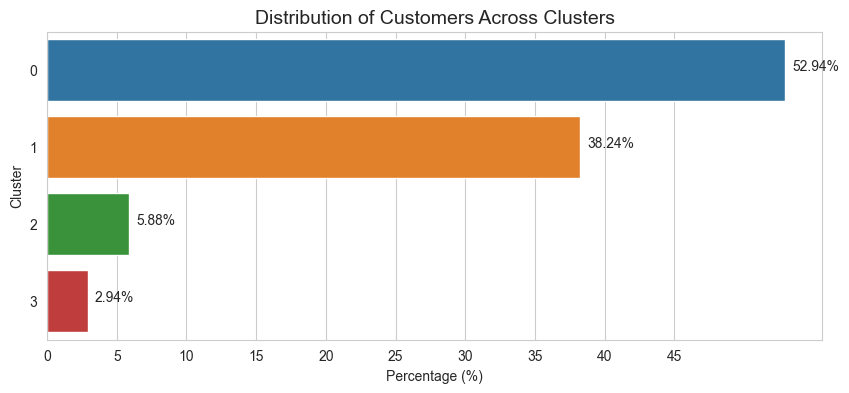

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         34          |
|    Silhouette Score     | 0.5484849644038546  |
| Calinski Harabasz Score |  217.4480668685185  |
|  Davies Bouldin Score   | 0.39707646704761407 |
+-------------------------+---------------------+


In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from tabulate import tabulate
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering using the optimal k (now 4)
agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative.fit(data)

# Get the frequency of each cluster
cluster_frequencies = Counter(agglomerative.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in agglomerative.labels_])

# Append the new cluster labels to the dataset
data['cluster'] = new_labels

####################################################################################################

# Calculate the percentage of customers in each cluster
cluster_percentage = (data['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

# Compute number of customers
num_observations = len(data)

# Separate the features and the cluster labels
X = data.drop('cluster', axis=1)
clusters = data['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


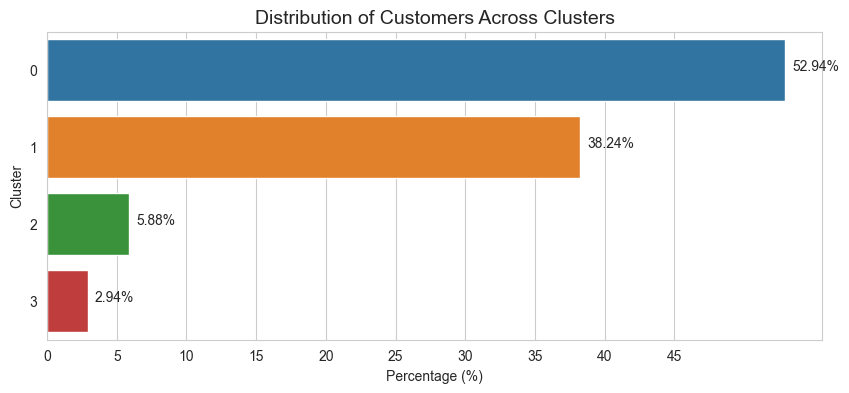

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         34          |
|    Silhouette Score     | 0.5484849644038546  |
| Calinski Harabasz Score |  217.4480668685185  |
|  Davies Bouldin Score   | 0.39707646704761407 |
+-------------------------+---------------------+


In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from tabulate import tabulate
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=0)
clusters = gmm.fit_predict(data)

# Get the frequency of each cluster
cluster_frequencies = Counter(clusters)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in clusters])

# Append the new cluster labels to the dataset
data['cluster'] = new_labels

####################################################################################################

# Calculate the percentage of customers in each cluster
cluster_percentage = (data['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

# Compute number of customers
num_observations = len(data)

# Separate the features and the cluster labels
X = data.drop('cluster', axis=1)
clusters = data['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import folium

# Import GeoJSON Data
file_geo = './geo_IDN.json'
df_geo = gpd.read_file(file_geo)
display(df_geo.head())

GID_0     NAME_0    GID_1           NAME_1 VARNAME_1 NL_NAME_1     TYPE_1  \
0   IDN  Indonesia  IDN.1_1             Aceh                      Propinisi   
1   IDN  Indonesia  IDN.2_1             Bali                      Propinisi   
2   IDN  Indonesia  IDN.3_1  Bangka Belitung                      Propinisi   
3   IDN  Indonesia  IDN.4_1           Banten                      Propinisi   
4   IDN  Indonesia  IDN.5_1         Bengkulu                      Propinisi   

  ENGTYPE_1 CC_1 HASC_1                                           geometry  
0  Province   11  ID.AC  MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...  
1  Province   51  ID.BA  MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...  
2  Province   19  ID.BB  MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...  
3  Province   36  ID.BT  MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...  
4  Province   17  ID.BE  MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...

In [12]:
unique_values = df_geo.iloc[:, 3].nunique()
print(unique_values)

33


In [20]:
a = data['Province'].nunique()
print(a)

34


In [17]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_0      33 non-null     object  
 1   NAME_0     33 non-null     object  
 2   GID_1      33 non-null     object  
 3   NAME_1     33 non-null     object  
 4   VARNAME_1  33 non-null     object  
 5   NL_NAME_1  33 non-null     object  
 6   TYPE_1     33 non-null     object  
 7   ENGTYPE_1  33 non-null     object  
 8   CC_1       33 non-null     object  
 9   HASC_1     33 non-null     object  
 10  geometry   33 non-null     geometry
dtypes: geometry(1), object(10)
memory usage: 3.0+ KB


In [18]:
df = pd.read_csv('data_stunting_1.csv')
data['Province'] = df['Provinsi']
data

,Persentase Keluarga Terkena Khasus Stunting,Keluhan Kesehatan,Balita Stunting,Balita Wasting,Balita Underweight,Indeks Khusus Penanganan Stunting,Jumlah Murid TK,cluster,Province
0,62.20,68.78,33.2,10.7,23.8,61.95,95644,0,Aceh
1,62.31,71.70,25.8,7.9,16.5,58.56,108145,0,Sumatera Utara
2,67.55,55.09,23.3,7.4,18.1,63.97,81172,0,Sumatera Barat
3,62.57,80.27,22.3,9.2,19.3,60.04,80164,0,Riau
4,60.23,74.06,22.4,9.1,16.7,61.03,47324,0,Jambi
...,...,...,...,...,...,...,...,...,...
29,71.30,72.98,33.8,7.1,23.1,66.03,23063,1,Sulawesi Barat
30,67.83,68.40,28.7,12.0,26.4,50.91,20652,1,Maluku
31,65.86,66.58,27.5,10.6,22.4,53.42,20207,1,Maluku Utara
32,73.79,64.05,26.2,10.8,19.9,56.45,11223,1,Papua Barat


In [ ]:
# Merge df_geo and poverty.csv
df_merged = df_geo.merge(data, how='inner', left_on='NAME_1', right_on='Province')
df_merged = df_merged[['Province', 'ISO', 'Poor 2020', 'Poor 2021', 'Difference', 'Rate', 'geometry']]
df_merged

KeyError: "['ISO', 'Poor 2020', 'Poor 2021', 'Difference', 'Rate'] not in index"

In [ ]:
# Create variables that will be used in some parameters later 
values = 'Rate'
values2 = "Indonesia's Poverty Rate 2020-2021"
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# Set the value range for the choropleth map
vmin, vmax = df_merged[values].min(), df_merged[values].max()
# Remove the axis as we do not need it
ax.axis('off')
# Add a map title
title = '{}'.format(values2)
ax.set_title(title, fontdict={'fontsize':'20', 'fontweight':'10'})
# Create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, fontweight='bold', color='k')
# Generate the map
df_merged.plot(column=values, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True)


In [ ]:
import requests
import pandas as pd
import plotly.graph_objects as go

# indonesia geojson
geojson = requests.get(
    "https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province-simple.json"
).json()

# dataframe with columns referenced in question
df = pd.DataFrame(
    {"Column": pd.json_normalize(geojson["features"])["properties.Propinsi"]}
).assign(Columnnext=lambda d: d["Column"].str.len())

fig8 = go.Figure(
    data=go.Choropleth(
        geojson=geojson,
        locations=df["Column"],  # Spatial coordinates
        featureidkey="properties.Propinsi",
        z=df["Columnnext"],  # Data to be color-coded
        colorscale="Reds",
        colorbar_title="Column",
    )
)
fig8.update_geos(fitbounds="locations", visible=False)
fig8